#  Product Classification

## Data Loading and Preprocessing:

The original dataset has been split into two parts, i.e., training and testing data. With training data, you can construct your model and find the optimal parameters required by the algorithm. With testing data, you are about to evaluate the performance. To start with, please conduct the following tasks: 1- Load the original data, print out the exact number of instances and number of classes; 2- Properly handle missing values in the dataset, remove non-numerical class labels if there exists any, and filtering out rows with all zero values. 3- Randomly split the original data into two parts: 80% for training and 20% for testing.

2.2 Algorithm Implementation:

In this question, you will be developing the following 7 different predictive models with the help of sklearn.

K-Nearest Neighbors;

Linear Regression;

Random Forest;

Neural Network (Multi Layer Perceptron);

Naive Bayes;

AdaBoost;

Linear SVM; 

You do not need to implement those algorithms from scratch. Instead, you can adopt the ready to use functions from the package, and document your methods carefully. Please note some system parameters may affect the performance of your predictors, e.g., the value of N in KNN, the number of trees in Random Forest, etc. You are free to examine different settings and identify the best parameters fit for the data.

In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
#reading the dataset
df=pd.read_csv('desktop/otto.csv')

In [3]:
#show number of culumns and number of rows
df.shape

(61878, 95)

In [4]:
#show the first 5 rows of dataset
df.head(5)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
#To filter out rows that contain zero values, you can use
df2 = df.loc[(df != 0).all(axis=1), :]

## K-Nearest Neighbors

In [6]:
#convert target columns object to numerical values
import pandas as pd
import numpy as np
df=pd.read_csv('desktop/otto.csv')
num = {"target": {"class_1": 1, "class_2": 2, "class_3": 3,"class_4": 4,"class_5": 5,"class_6": 6,"class_7": 7,"class_8": 8,"class_9": 9}}
df = df.replace(num)
df["target"] = df["target"].astype('category')
df["target"] = df["target"].cat.codes

In [7]:
df=df.drop(['id'],axis=1)

In [8]:
#now prepare the model for the training and testing
#df2 = df.loc[(df != 0).all(axis=1), :]
y=df['target']
x=df.drop(['target'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2, stratify= y)

In [9]:
# Import the K Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# Create K Neighbor classifer objec
classifier = KNeighborsClassifier(n_neighbors=15, weights='distance')
# Train K Neighbor Classifer
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [10]:
#Predict the response for test dataset
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test), axis = 1)

,0,target
0,1.0,NaN
1,5.0,NaN
2,5.0,NaN
3,0.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [11]:
#show the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)

Confusion Matrix:
[[ 184   13    3    0    4   21    9   56   96]
 [   2 2716  449   23    8    1   14    3    8]
 [   1  784  750   27    1    2   27    4    5]
 [   0  258  120  133    3   15    7    0    2]
 [   1   12    4    0  529    1    1    0    0]
 [  24   48    4    3    3 2612   42   42   49]
 [  23   80   45    4    5   25  343   37    6]
 [  36   27    8    0    1   36   20 1530   35]
 [  23   24    1    0    4   21    6   22  890]]
Accuracy Score:


0.7827246283128636

In [12]:
#show F1 Score
from sklearn.metrics import f1_score
print('F1 for K-Nearest Neighbors is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for K-Nearest Neighbors is:  0.7740390020228105


In [13]:
df_KNN=df_y_pred

# linear regression

In [14]:
# Import the Linear Regression classifier
from sklearn.linear_model import LogisticRegression
# Create Linear Regression classifer object
classifier = LogisticRegression(solver = 'saga',warm_start = True, l1_ratio=0.3, penalty = 'elasticnet',C=1,random_state = 0,max_iter = 500)
# Train Random forest Classifer
classifier.fit(x_train,y_train)

/Users/sara/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1, l1_ratio=0.3, max_iter=500, penalty='elasticnet',
                   random_state=0, solver='saga', warm_start=True)

In [15]:
#Predict the response for test dataset
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test), axis = 1)

,0,target
0,1.0,NaN
1,5.0,NaN
2,5.0,NaN
3,5.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [16]:
#Show the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)

Confusion Matrix:
[[ 145   17    0    0    2   35   13   84   90]
 [   2 2836  308   34   11    5   15    6    7]
 [   0 1048  485   19    0    3   38    7    1]
 [   0  288   27  186    1   25    9    1    1]
 [   0   37    1    0  510    0    0    0    0]
 [   4   27    3   14    1 2622   37   64   55]
 [  13   83   41    8    3   73  308   35    4]
 [  39   19    4    0    0   49   23 1533   26]
 [  26   16    0    0    2   34    2   45  866]]
Accuracy Score:


0.7668875242404655

In [17]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for Linear Regression is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for Linear Regression is:  0.750144559579084


In [18]:
df_LR=df_y_pred

# Random Forest

In [19]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# Create Random forest classifer object
classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 0)
# Train Random forest Classifer
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=35, random_state=0)

In [20]:
#Predict the response for test dataset
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test),axis = 1)

,0,target
0,1.0,NaN
1,5.0,NaN
2,5.0,NaN
3,5.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [21]:
#Show the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)

Confusion Matrix:
[[ 143   12    3    0    3   42    9   88   86]
 [   0 2847  317   27    5    7   11    5    5]
 [   1  796  749   25    0    0   19    7    4]
 [   0  222   75  216    2   21    1    1    0]
 [   1   18    0    0  524    2    1    0    2]
 [   9   29    3    3    1 2689   24   41   28]
 [   5   93   37    5    7   46  307   60    8]
 [  21   13    3    0    1   62    6 1560   27]
 [  17   17    0    1    2   36    5   38  875]]
Accuracy Score:


0.8007433742727861

In [22]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for Random Forest is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for Random Forest is:  0.7896154813908827


In [23]:
df_RF=df_y_pred

## Neural Network (Multi Layer Perceptron);

In [24]:
# Import the Neural Network classifier
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [25]:
columns = df.columns[1:-1] # feature column, last column is "label"
X = df[columns]
y = np.ravel(df['target'])
# Create Neural Network  classifer object
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)
# Train Neural Network Classifer
model.fit(X, y)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3199     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.87201D+00    |proj g|=  5.85780D-01

At iterate    1    f=  1.95240D+00    |proj g|=  1.82910D-01


 This problem is unconstrained.



At iterate    2    f=  1.75290D+00    |proj g|=  1.75059D-01

At iterate    3    f=  1.61369D+00    |proj g|=  8.31734D-01

At iterate    4    f=  1.45253D+00    |proj g|=  1.23863D-01

At iterate    5    f=  1.39215D+00    |proj g|=  1.08555D-01

At iterate    6    f=  1.26454D+00    |proj g|=  6.12236D-01

At iterate    7    f=  1.20959D+00    |proj g|=  2.54741D-01

At iterate    8    f=  1.16802D+00    |proj g|=  1.77814D-01

At iterate    9    f=  1.09035D+00    |proj g|=  1.82182D-01

At iterate   10    f=  1.04452D+00    |proj g|=  1.83355D-01

At iterate   11    f=  1.00670D+00    |proj g|=  1.71308D-01

At iterate   12    f=  9.81394D-01    |proj g|=  6.86087D-01

At iterate   13    f=  9.56999D-01    |proj g|=  5.62877D-01

At iterate   14    f=  9.40874D-01    |proj g|=  8.89524D-02

At iterate   15    f=  9.31600D-01    |proj g|=  4.77893D-02

At iterate   16    f=  8.98996D-01    |proj g|=  1.01564D-01

At iterate   17    f=  8.77405D-01    |proj g|=  2.50583D-01

At iter

/Users/sara/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 10), random_state=1,
              solver='lbfgs', verbose=True)

In [26]:
#Predict the response for test dataset
pred = model.predict(X)
pred

array([5, 7, 0, ..., 8, 8, 8], dtype=int8)

In [27]:
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test), axis = 1)

,0,target
0,1.0,NaN
1,5.0,NaN
2,5.0,NaN
3,5.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [28]:
#Show the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)

Confusion Matrix:
[[ 143   12    3    0    3   42    9   88   86]
 [   0 2847  317   27    5    7   11    5    5]
 [   1  796  749   25    0    0   19    7    4]
 [   0  222   75  216    2   21    1    1    0]
 [   1   18    0    0  524    2    1    0    2]
 [   9   29    3    3    1 2689   24   41   28]
 [   5   93   37    5    7   46  307   60    8]
 [  21   13    3    0    1   62    6 1560   27]
 [  17   17    0    1    2   36    5   38  875]]
Accuracy Score:


0.8007433742727861

In [29]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for Neural Network is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for Neural Network is:  0.7896154813908827


In [30]:
df_NN=df_y_pred

## Naive Bayes

In [31]:
# Import the Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# Create Navie Bayes classifer object
classifier = GaussianNB()
# Train Navie Bayes Classifer
classifier.fit(x_train,y_train)

GaussianNB()

In [32]:
#Predict the response for test dataset
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test), axis=1)

,0,target
0,4.0,NaN
1,5.0,NaN
2,5.0,NaN
3,8.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [33]:
#Show the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)

Confusion Matrix:
[[ 113   26   16   15   29   13   23   13  138]
 [   3 2102  328  406  285    5   54   21   20]
 [   1  727  404  282  111    1   59   10    6]
 [   0  166   22  278   46    6   11    0    9]
 [   0   23    2    5  512    2    2    0    2]
 [  67   36   54  157   35 2203   90   33  152]
 [  29   55   64   59   24   25  283   16   13]
 [ 304   15   22    9   19   56  137  896  235]
 [  39   27   17   20   62   21    6   13  786]]
Accuracy Score:


0.6122333548804137

In [34]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for Navie Bayes is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for Navie Bayes is:  0.6213203089552608


In [35]:
df_NB=df_y_pred

## AdaBoost

In [36]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=80, learning_rate=0.35, random_state=0)
# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(x_test)

In [37]:
#Show the Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)


Confusion Matrix:
[[ 113   26   16   15   29   13   23   13  138]
 [   3 2102  328  406  285    5   54   21   20]
 [   1  727  404  282  111    1   59   10    6]
 [   0  166   22  278   46    6   11    0    9]
 [   0   23    2    5  512    2    2    0    2]
 [  67   36   54  157   35 2203   90   33  152]
 [  29   55   64   59   24   25  283   16   13]
 [ 304   15   22    9   19   56  137  896  235]
 [  39   27   17   20   62   21    6   13  786]]
Accuracy Score:


0.6122333548804137

In [38]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for AdaBoost is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for AdaBoost is:  0.6213203089552608


In [39]:
df_Ada=df_y_pred

## Linear SVM

In [40]:
# Import the SVC classifier
from sklearn.svm import SVC
# Create SVC classifer object
classifier = SVC(kernel = 'rbf', probability = True, random_state = 2)
# Train SVC Classifer
classifier.fit(x_train,y_train)

SVC(probability=True, random_state=2)

In [41]:
#Predict the response for test dataset
df_y_pred = pd.Series(classifier.predict(x_test))
pd.concat((df_y_pred,y_test),axis = 1)

,0,target
0,1.0,NaN
1,5.0,NaN
2,5.0,NaN
3,0.0,NaN
4,5.0,NaN
...,...,...
16415,NaN,1.0
57277,NaN,8.0
45612,NaN,5.0
34208,NaN,5.0


In [42]:
#Show the Confusion Matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, df_y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:')
accuracy_score(y_test,df_y_pred)
df_svm=df_y_pred

Confusion Matrix:
[[ 177   15    0    0    3   34    7   68   82]
 [   2 2957  226    9    6    5   11    3    5]
 [   1 1094  450   11    0    1   35    6    3]
 [   0  309   42  153    2   23    7    1    1]
 [   0   29    1    0  518    0    0    0    0]
 [  13   30    0    6    1 2641   31   56   49]
 [  16   84   29    1    3   34  367   32    2]
 [  26   23    3    0    0   26   14 1574   27]
 [  19   15    1    0    1   22    3   47  883]]
Accuracy Score:


In [43]:
#Show the F1 Score
from sklearn.metrics import f1_score
print('F1 for SVM linear is: ', f1_score(y_test, df_y_pred,average="weighted"))

F1 for SVM linear is:  0.7658964332997207


In [44]:
df_svm=df_y_pred

2.3 Performance Comparison: 5 points
To evaluate the performance of different methods, please compute the F1 measure of each algorithm under its optimal
setting, and conclude which method works best in your experiment. In addition, to identify the similarities between different
algorithms, you are expected to visualize the pair-wise correlations with a heatmap. You are free to import the seaborn
package for illustrating the table, and a sample code of using the package can be found online 2.
Hint: Use the predicted results of the test dataset to formulate a vector for each algorithm, and then analyze the correlations
among different prediction vectors.
2https://seaborn.pydata.org/examples/heatmap annotation.html
3

## Random Forest  with the F1 of about 78.96% is the best one and the least one is for Navie Bayes with F1= 62% .

## creating a dataframe of the y_pred of each classifier

In [45]:

import seaborn as sns
import matplotlib.pyplot as plt
   
df = {'KNN': df_KNN, 'Linear Regression': df_LR, 'Random forest':df_RF,'Nneural network':df_NN,'Naive Bayes':df_NB,'Adaboost':df_Ada,'SVM':df_svm}
d = pd.DataFrame(data=df)
d



,KNN,Linear Regression,Random forest,Nneural network,Naive Bayes,Adaboost,SVM
0,1,1,1,1,4,4,1
1,5,5,5,5,5,5,5
2,5,5,5,5,5,5,5
3,0,5,5,5,8,8,0
4,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...
12371,1,1,1,1,1,1,1
12372,8,8,8,8,0,0,8
12373,5,5,5,5,5,5,5
12374,7,7,7,7,8,8,7


## show the heatmap for all classifiers

<AxesSubplot:>

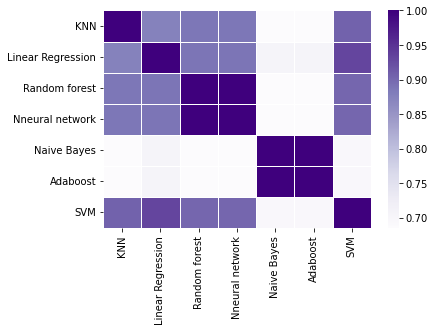

In [46]:

import seaborn as sns
import pandas as pd
import numpy as np

corr = d.corr()
p1= sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidth=0.5,cmap="Purples")

p1